In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm

import prepare as pr 

In [5]:
dfs = pd.read_csv('saas.csv')

In [6]:
# dfs = df.sample(10000)

# clean

In [7]:
dfs.Month_Invoiced = pd.to_datetime(dfs.Month_Invoiced)

In [8]:
dfs.rename(columns={"Month_Invoiced":"date"},inplace= True)

In [9]:
dfs.head(1)

,date,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0


In [20]:
dfs.shape

(790458, 5)

In [19]:
# dfs.nunique(Invoice_Id)

NameError: name 'Invoice_Id' is not defined

In [21]:
dfs.Subscription_Type.value_counts()

0.0    496410
1.0    178212
2.0     70706
3.0     26474
4.0     18656
Name: Subscription_Type, dtype: int64

In [22]:
dfs.Amount.value_counts() 

0.0     496410
5.0     178212
10.0     70706
15.0     26474
20.0     18656
Name: Amount, dtype: int64

In [23]:
dfs = dfs.set_index('date')

In [24]:
print('Date Range:', dfs.index.min(), 'to', dfs.index.max())
print('Shape:', dfs.shape)



Date Range: 2014-01-31 00:00:00 to 2017-12-31 00:00:00
Shape: (790458, 4)


In [25]:
dfs = dfs.fillna(0)

# end clean

# Split data (train/validate/test) and resample by any period except daily. Aggregate using the sum.

In [26]:
train_size = int(len(dfs) * .5)
validate_size = int(len(dfs) * .3)
test_size = int(len(dfs) - train_size - validate_size)
validate_end_index = train_size + validate_size

# split into train, validation, test
train = dfs[: train_size]
validate = dfs[train_size : validate_end_index]
test = dfs[validate_end_index : ]

# visualize the split

In [27]:
train.shape,validate.shape,test.shape

((395229, 4), (237137, 4), (158092, 4))

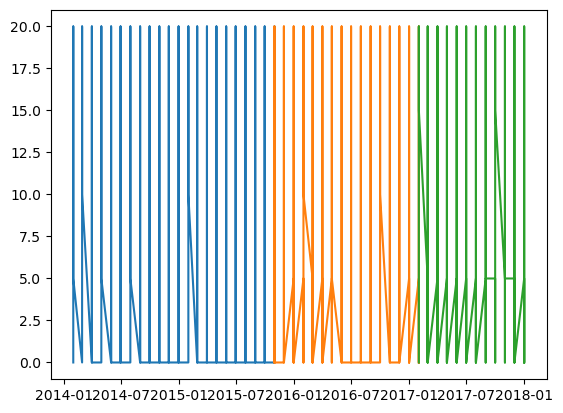

In [28]:

plt.plot(train.index, train.Amount)
plt.plot(validate.index, validate.Amount)
plt.plot(test.index, test.Amount)

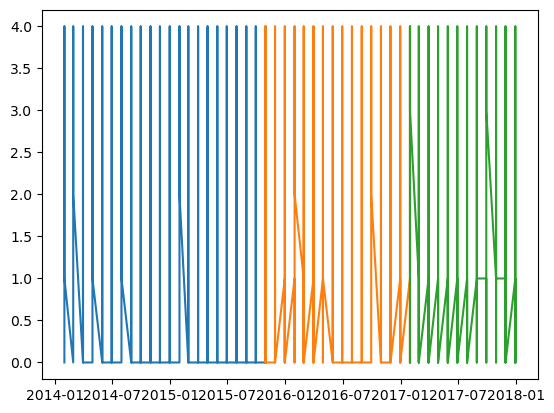

In [29]:
plt.plot(train.index, train.Subscription_Type)
plt.plot(validate.index, validate.Subscription_Type)
plt.plot(test.index, test.Subscription_Type)

# resample

In [30]:
y = train.resample('D').Amount.mean()
y.head()

date
2014-01-31    1.7925
2014-02-01       NaN
2014-02-02       NaN
2014-02-03       NaN
2014-02-04       NaN
Freq: D, Name: Amount, dtype: float64

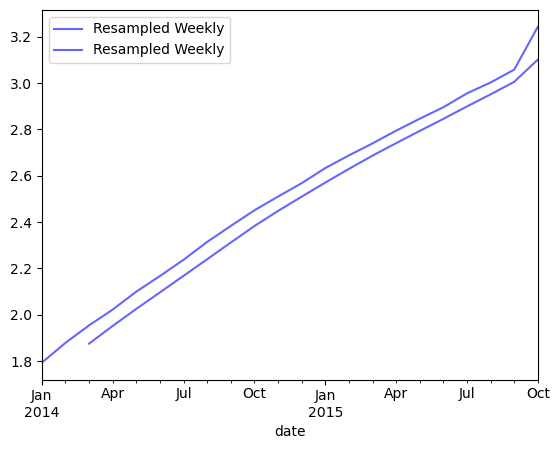

In [31]:
# Plot the M average & the 7-day moving average. Compare the 2 plots.
y.resample('M').mean().plot(label='Resampled Weekly', alpha=.6, color = 'blue')
y.resample('M').mean().rolling(3).mean().plot(label='Resampled Weekly', alpha=.6, color = 'blue')

plt.legend()

# functions that might help

In [32]:
# evaluation function to compute rmse
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse


In [33]:
# plot and evaluate 
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [34]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

# make predictions

In [35]:
subt = train['Subscription_Type'][-1:][0]

In [36]:
amnt = train['Amount'][-1:][0]

In [37]:
yhat_df = pd.DataFrame({'Subscription_Type': [subt], 'amount': [amnt]}, 
                       index = validate.index)


In [38]:
yhat_df.head()

,Subscription_Type,amount
date,,
2015-10-31,0.0,0.0
2015-10-31,0.0,0.0
2015-10-31,0.0,0.0
2015-10-31,0.0,0.0
2015-10-31,0.0,0.0


In [39]:
 plot_and_eval(col)

NameError: name 'col' is not defined

# Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:

# Simple Average

# Moving Average

# Holt's Linear Trend Model

# Based on previous year/month/etc., this is up to you.